In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [2]:
data = pd.read_csv('./Admission_Predict_Ver1.1.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.drop(columns=['Serial No.'],inplace=True)

In [4]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [6]:
data.shape

(500, 8)

In [7]:
data.size

4000

In [8]:
data.isnull().mean()*100

GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

In [9]:
data.duplicated().sum()

0

### rearranging columns

In [10]:
data = data[['CGPA','GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 
       'Research', 'Chance of Admit ']].copy()

In [11]:
data.head()

,CGPA,GRE Score,TOEFL Score,University Rating,SOP,LOR,Research,Chance of Admit
0,9.65,337,118,4,4.5,4.5,1,0.92
1,8.87,324,107,4,4.0,4.5,1,0.76
2,8.00,316,104,3,3.0,3.5,1,0.72
3,8.67,322,110,3,3.5,2.5,1,0.80
4,8.21,314,103,2,2.0,3.0,0,0.65


In [12]:
data.columns = data.columns.str.replace(" ","_")

In [13]:
data.head()

,CGPA,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,Research,Chance_of_Admit_
0,9.65,337,118,4,4.5,4.5,1,0.92
1,8.87,324,107,4,4.0,4.5,1,0.76
2,8.00,316,104,3,3.0,3.5,1,0.72
3,8.67,322,110,3,3.5,2.5,1,0.80
4,8.21,314,103,2,2.0,3.0,0,0.65


### Univariate analysis

In [14]:
data.columns

Index(['CGPA', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR_',
       'Research', 'Chance_of_Admit_'],
      dtype='object')

In [15]:
num_cols = ['CGPA', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR_']

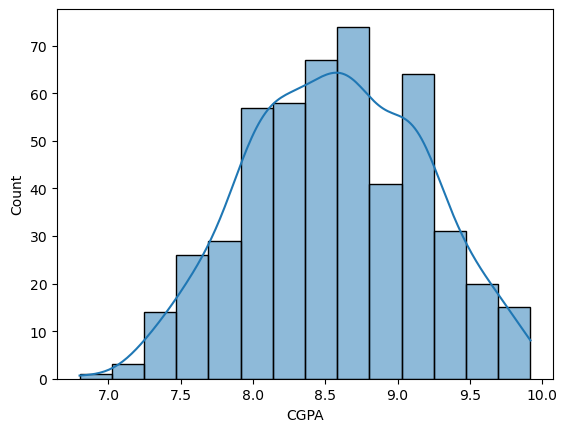

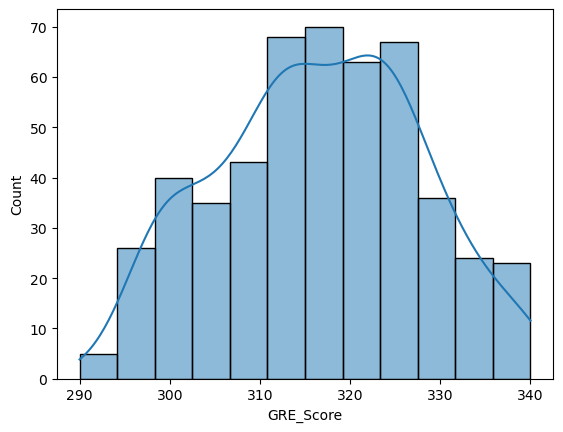

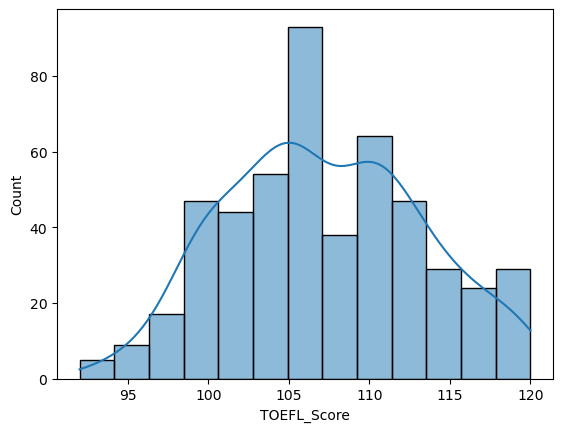

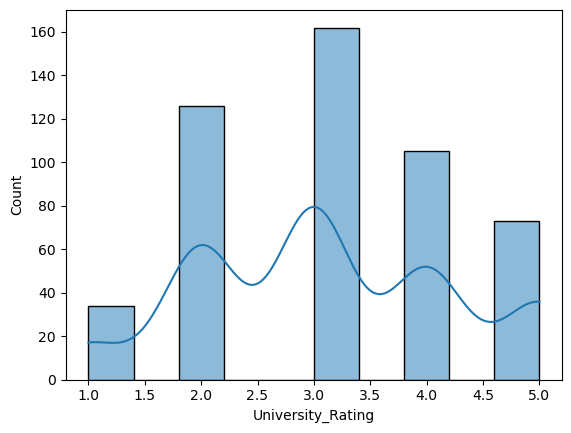

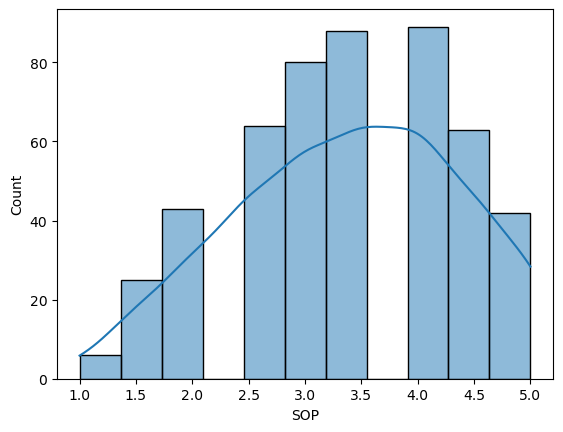

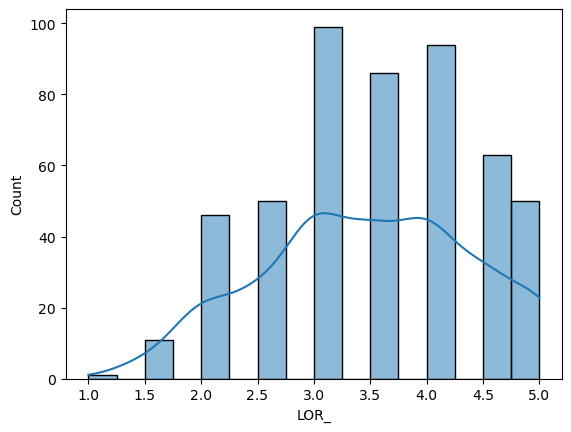

In [16]:
for i in num_cols:
    sns.histplot(x=data[i],kde=True)
    plt.show()

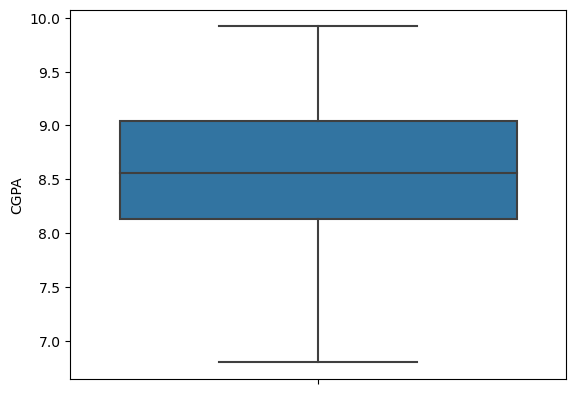

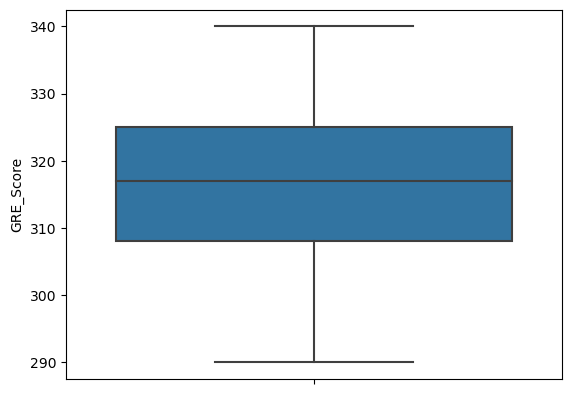

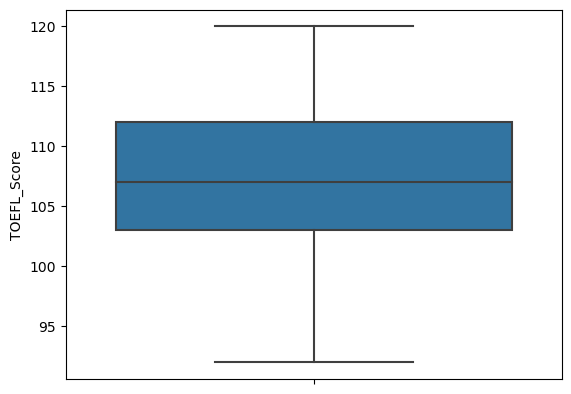

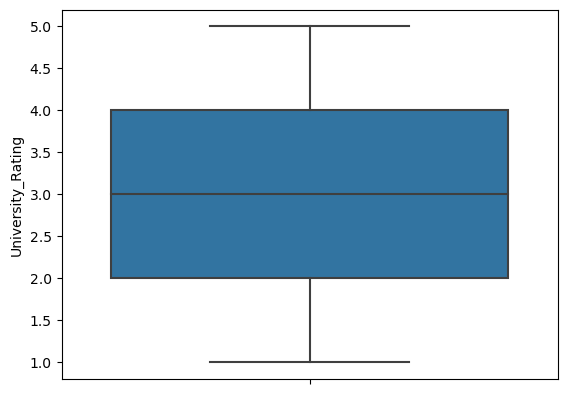

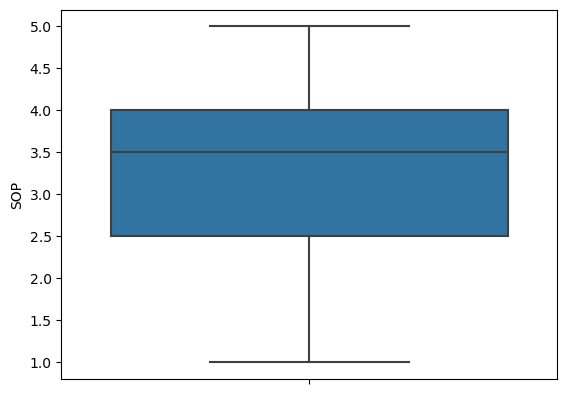

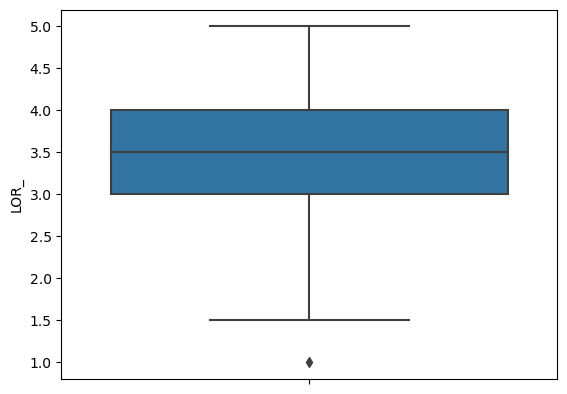

In [17]:
for i in num_cols:
    sns.boxplot(y=data[i])
    plt.show()

### Outlier treatment

In [18]:
### Setting outer limits
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile(col,[75,25])
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q3-1.5*IQR
    return UL,LL

In [19]:
UL,LL = outlier_limit(data.LOR_)
data['LOR_'] = np.where((data.LOR_>UL) | (data.LOR_<LL),np.nan,data.LOR_)

In [20]:
data.isnull().sum()

CGPA                  0
GRE_Score             0
TOEFL_Score           0
University_Rating     0
SOP                   0
LOR_                 58
Research              0
Chance_of_Admit_      0
dtype: int64

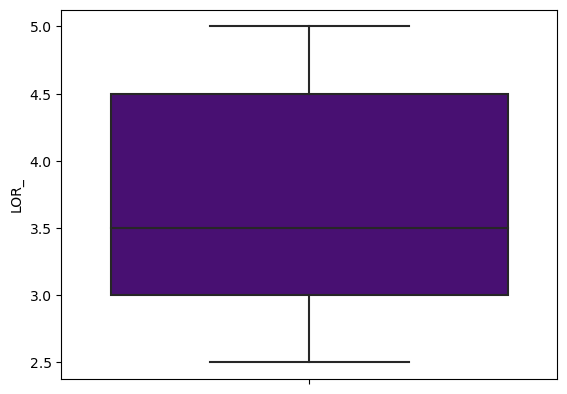

In [21]:
sns.boxplot(y=data.LOR_,data=data,color='Indigo');

In [22]:
data.dropna(inplace=True)
data.head()

,CGPA,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,Research,Chance_of_Admit_
0,9.65,337,118,4,4.5,4.5,1,0.92
1,8.87,324,107,4,4.0,4.5,1,0.76
2,8.00,316,104,3,3.0,3.5,1,0.72
3,8.67,322,110,3,3.5,2.5,1,0.80
4,8.21,314,103,2,2.0,3.0,0,0.65


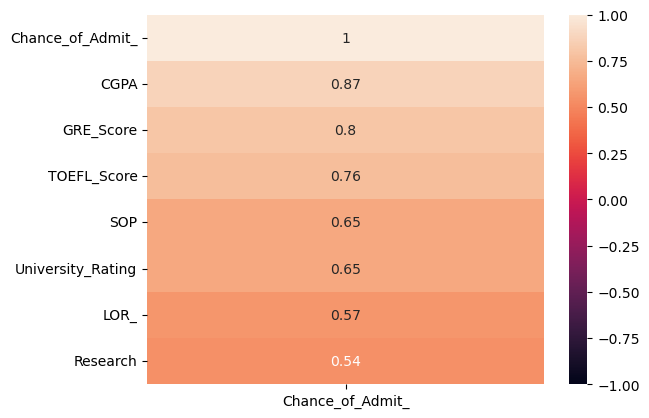

In [23]:
sns.heatmap(data.corr()[['Chance_of_Admit_']].sort_values(by='Chance_of_Admit_',ascending=False),vmax=1,vmin=-1,annot=True)
plt.show()

### Selecting high correlation columns

In [28]:
pred_data = data.drop(columns=['University_Rating', 'SOP', 'LOR_',
       'Research'])
pred_data.head()

,CGPA,GRE_Score,TOEFL_Score,Chance_of_Admit_
0,9.65,337,118,0.92
1,8.87,324,107,0.76
2,8.00,316,104,0.72
3,8.67,322,110,0.80
4,8.21,314,103,0.65


In [32]:
x = pred_data.iloc[:,:-1].values
y = pred_data.iloc[:,:-1].values

In [ ]:
sc = 